In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r"D:\Downloads\Largest-Companies.csv",encoding='latin1')
df.head()

,Rank,Name,Sales,Profit,Assets,Market Value,Industry,Founded,Headquarters,Country,CEO,Employees
0,1,JPMorgan Chase,252.9,50.0,4090.7,588.1,Banking and Financial Services,2000.0,New York- New York,United States,Jamie Dimon,186751.0
1,2,Berkshire Hathaway,369.0,73.4,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.9,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0
3,4,ICBC,223.8,50.4,6586.0,215.2,Banking and Financial Services,1984.0,Beijing,China,Wang Jingwu,427587.0
4,5,Bank of America,183.3,25.0,3273.8,307.3,Banking and Financial Services,1904.0,Charlotte- North Carolina,United States,Brian T. Moynihan,166140.0


In [5]:
df.isna().sum()

Rank             0
Name             0
Sales            0
Profit           0
Assets           0
Market Value     0
Industry         2
Founded          2
Headquarters    10
Country          0
CEO             31
Employees       58
dtype: int64

In [6]:
df.dropna()

,Rank,Name,Sales,Profit,Assets,Market Value,Industry,Founded,Headquarters,Country,CEO,Employees
0,1,JPMorgan Chase,252.9,50.00,4090.7,588.1,Banking and Financial Services,2000.0,New York- New York,United States,Jamie Dimon,186751.0
1,2,Berkshire Hathaway,369.0,73.40,1070.0,899.1,Conglomerate,1839.0,Omaha- Nebraska,United States,Warren Edward Buffett,396500.0
2,3,Saudi Arabian Oil Company (Saudi Aramco),489.1,116.90,661.5,1919.3,Construction- Chemicals- Raw Materials,1933.0,Dhahran,Saudi Arabia,Amin bin Hasan Al-Nasser,70000.0
3,4,ICBC,223.8,50.40,6586.0,215.2,Banking and Financial Services,1984.0,Beijing,China,Wang Jingwu,427587.0
4,5,Bank of America,183.3,25.00,3273.8,307.3,Banking and Financial Services,1904.0,Charlotte- North Carolina,United States,Brian T. Moynihan,166140.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1996,1997,Sichuan Chuantou Energy,0.2,0.63,8.6,11.3,Utilities,2001.0,Chengdu,China,Hong Yang,1453.0
1997,1998,Vietnam Prosperity Joint-sock Commercial Bank,3.9,0.46,33.2,6.0,Banking,1993.0,Ha Noi,Vietnam,Vinh Duc Nguyen,24973.0
1998,1999,Adient,15.2,0.16,9.3,2.6,Consumer Durables,1985.0,Plymouth- Michigan,United States,Jerome Dorlack MBA,70000.0
1999,2000,CapitaLand Investment,2.2,0.13,25.9,10.0,Diversified Financials,2000.0,Singapore,Singapore,Chee Koon Lee,45000.0


In [10]:
df.replace(["", "N/A", "null"], pd.NA, inplace=True)
df.dropna(inplace=True)

In [11]:
df.isna().sum()

Rank            0
Name            0
Sales           0
Profit          0
Assets          0
Market Value    0
Industry        0
Founded         0
Headquarters    0
Country         0
CEO             0
Employees       0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 0 to 2000
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          1906 non-null   int64  
 1   Name          1906 non-null   object 
 2   Sales         1906 non-null   float64
 3   Profit        1906 non-null   float64
 4   Assets        1906 non-null   float64
 5   Market Value  1906 non-null   float64
 6   Industry      1906 non-null   object 
 7   Founded       1906 non-null   float64
 8   Headquarters  1906 non-null   object 
 9   Country       1906 non-null   object 
 10  CEO           1906 non-null   object 
 11  Employees     1906 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 193.6+ KB


<Axes: >

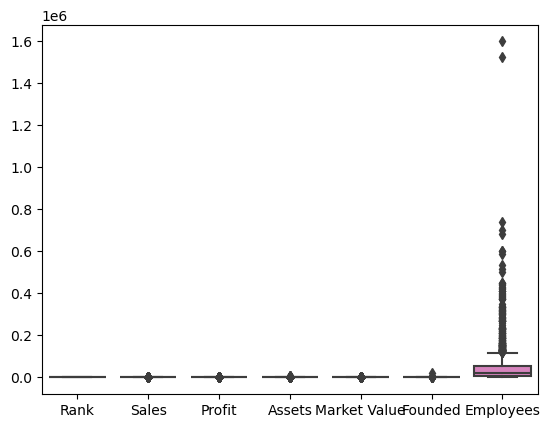

In [14]:
import seaborn as sns

sns.boxplot(data = df)

In [15]:
for i in df:
    if df[i].dtype in ("float64","int64"):
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        df[i].clip(upper = ul, lower = ll, inplace = True)

<Axes: >

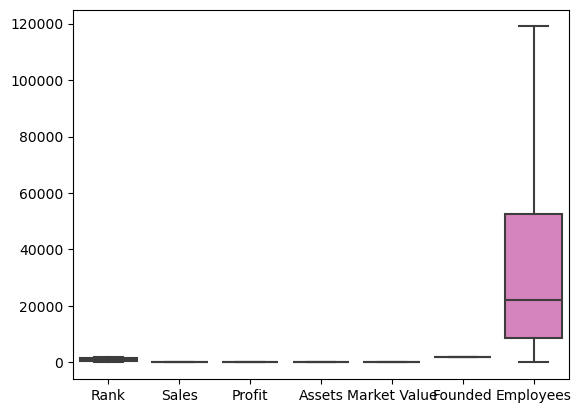

In [16]:
sns.boxplot(data = df)

In [19]:
a = df.drop(['Name','Industry','Headquarters','Country','CEO'],axis = 1)
a

,Rank,Sales,Profit,Assets,Market Value,Founded,Employees
0,1,55.1,4.735,173.25,85.05,2000.0,118954.875
1,2,55.1,4.735,173.25,85.05,1839.0,118954.875
2,3,55.1,4.735,173.25,85.05,1933.0,70000.000
3,4,55.1,4.735,173.25,85.05,1984.0,118954.875
4,5,55.1,4.735,173.25,85.05,1904.0,118954.875
...,...,...,...,...,...,...,...
1996,1997,0.2,0.630,8.60,11.30,2001.0,1453.000
1997,1998,3.9,0.460,33.20,6.00,1993.0,24973.000
1998,1999,15.2,0.160,9.30,2.60,1985.0,70000.000
1999,2000,2.2,0.130,25.90,10.00,2000.0,45000.000


In [20]:
x = a.drop('Sales', axis =1)
y = a[['Sales']]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test , y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state = 11)

In [25]:
train = pd.concat([x_train, y_train], axis = 1)
train.head()

,Rank,Profit,Assets,Market Value,Founded,Employees,Sales
1014,1015,1.10,23.6,9.1,1920.0,46580.0,14.2
1945,1946,0.70,7.0,10.9,1929.0,5000.0,3.4
1048,1049,1.30,85.7,8.4,1924.0,8617.0,6.1
1416,1417,-1.70,26.8,3.8,1985.0,27791.0,16.8
1422,1423,0.56,86.9,5.2,1996.0,11803.0,3.3


In [27]:
correlation = train.corr()

In [32]:
correlation.style.applymap(lambda x : 'background-color : yellow' if x > 0.70  else '')

C:\Users\rajat\AppData\Local\Temp\ipykernel_10796\1452654819.py:1: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  correlation.style.applymap(lambda x : 'background-color : yellow' if x > 0.70  else '')


,Rank,Profit,Assets,Market Value,Founded,Employees,Sales
Rank,1.000000,-0.775896,-0.621364,-0.698489,0.123055,-0.480687,-0.706436
Profit,-0.775896,1.000000,0.530199,0.701531,-0.097626,0.363684,0.587897
Assets,-0.621364,0.530199,1.000000,0.316626,-0.086002,0.253261,0.495208
Market Value,-0.698489,0.701531,0.316626,1.000000,-0.058928,0.373779,0.475651
Founded,0.123055,-0.097626,-0.086002,-0.058928,1.000000,-0.105814,-0.129901
Employees,-0.480687,0.363684,0.253261,0.373779,-0.105814,1.000000,0.651405
Sales,-0.706436,0.587897,0.495208,0.475651,-0.129901,0.651405,1.000000


<Axes: >

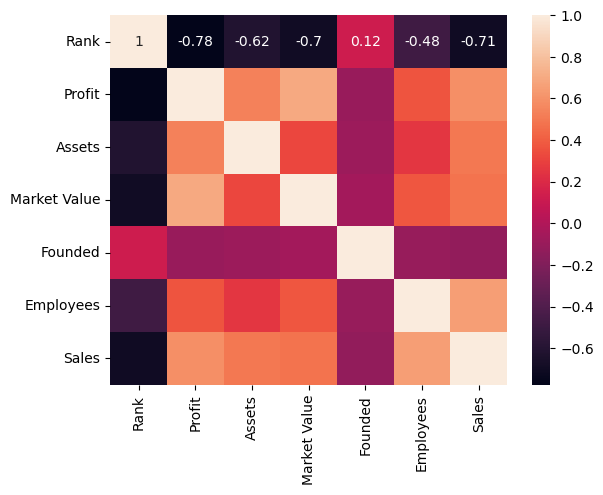

In [94]:
sns.heatmap(correlation, annot = True)

# VIF Varience Inflation Factor¶

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
x1 = a.drop(['Sales'],axis = 1)
series_before = pd.Series([variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])], index = x1.columns)   # i = 0,1,2,3....8

In [37]:
series_before

Rank            15.546518
Profit           5.531259
Assets           3.524740
Market Value     4.982324
Founded         34.289473
Employees        2.609818
dtype: float64

## Multi- colinearity is Present in Dataset

# Model Builiding

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [41]:
lreg = LinearRegression()

In [50]:
model = sfs(lreg , n_features_to_select= 4 , direction = 'forward', scoring = 'r2')

In [51]:
model.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=4,
                          scoring='r2')

In [52]:
model.feature_names_in_

array(['Rank', 'Profit', 'Assets', 'Market Value', 'Founded', 'Employees'],
      dtype=object)

In [53]:
model.get_feature_names_out()

array(['Rank', 'Profit', 'Assets', 'Employees'], dtype=object)

## Method - 2 Sklearn

In [57]:
from sklearn.linear_model import LinearRegression

In [59]:
x_train = x_train.loc[:,['Rank', 'Profit', 'Assets', 'Employees']]
x_train.head()

,Rank,Profit,Assets,Employees
1014,1015,1.10,23.6,46580.0
1945,1946,0.70,7.0,5000.0
1048,1049,1.30,85.7,8617.0
1416,1417,-1.70,26.8,27791.0
1422,1423,0.56,86.9,11803.0


In [61]:
train = pd.concat([x_train, y_train], axis = 1)
train.head()

,Rank,Profit,Assets,Employees,Sales
1014,1015,1.10,23.6,46580.0,14.2
1945,1946,0.70,7.0,5000.0,3.4
1048,1049,1.30,85.7,8617.0,6.1
1416,1417,-1.70,26.8,27791.0,16.8
1422,1423,0.56,86.9,11803.0,3.3


In [62]:
model3 = LinearRegression()

In [63]:
model3.fit(x_train, y_train)

LinearRegression()

In [65]:
import numpy as np
np.round(model3.intercept_,2)   # B0

array([18.89])

In [69]:
np.round(model3.coef_,3)

array([[-0.01 ,  1.   ,  0.034,  0.   ]])

In [70]:
model3.feature_names_in_

array(['Rank', 'Profit', 'Assets', 'Employees'], dtype=object)

# Prediction on train

In [71]:
train['fitted'] = np.round(model3.predict(x_train),2)

In [72]:
train['residual'] = np.round(train.Sales - train.fitted,2)

In [73]:
train.head()

,Rank,Profit,Assets,Employees,Sales,fitted,residual
1014,1015,1.10,23.6,46580.0,14.2,18.85,-4.65
1945,1946,0.70,7.0,5000.0,3.4,0.52,2.88
1048,1049,1.30,85.7,8617.0,6.1,13.82,-7.72
1416,1417,-1.70,26.8,27791.0,16.8,8.51,8.29
1422,1423,0.56,86.9,11803.0,3.3,9.82,-6.52


## Accuracy

In [74]:
from sklearn.metrics import r2_score

In [76]:
r2 = r2_score(train.Sales, train.fitted)
r2*100

63.82326548968853

## Loss / Cost / Error Function - RMSE

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
model_mse = mean_squared_error(train['Sales'], train['fitted'])
model_rmse = np.sqrt(model_mse)
model_rmse

9.951055883342395

## Assumption of model

## 1.Linearity

<Axes: xlabel='Rank', ylabel='Sales'>

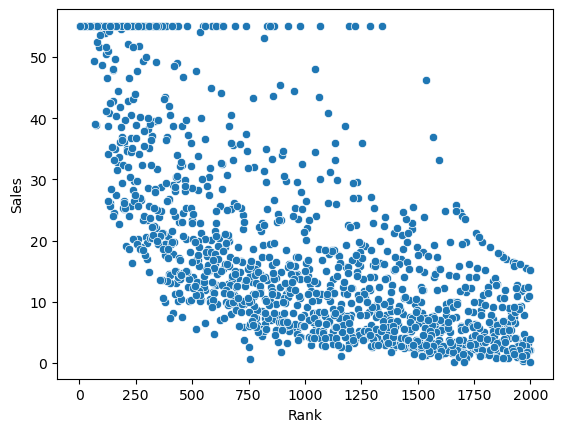

In [82]:
sns.scatterplot(x = 'Rank', y ='Sales', data = train)

<Axes: xlabel='fitted', ylabel='residual'>

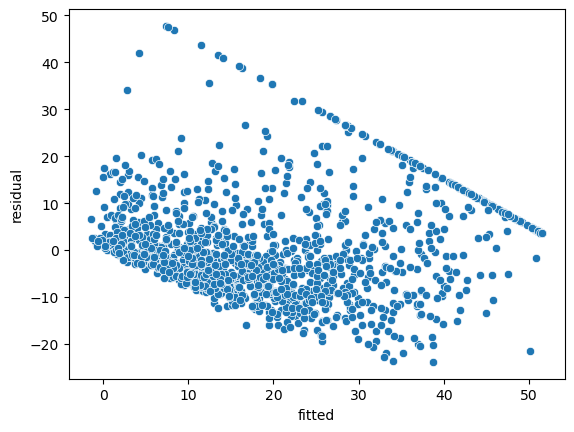

In [83]:
sns.scatterplot(x = 'fitted', y = 'residual', data = train)

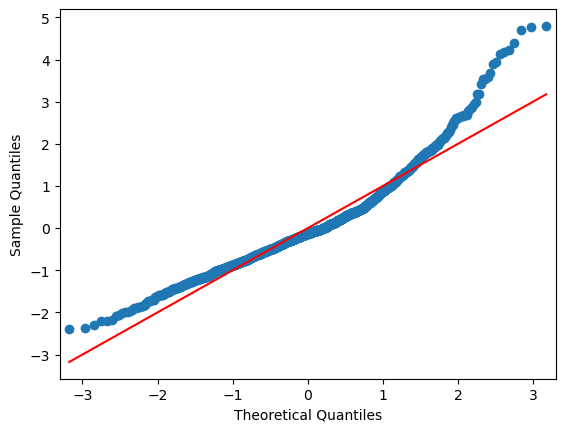

In [84]:
import statsmodels.api as sm
fig = sm.qqplot(train['residual'], fit=True, line='s') # s indicate standardized line
import matplotlib.pyplot as plt
plt.show()

<Axes: ylabel='Frequency'>

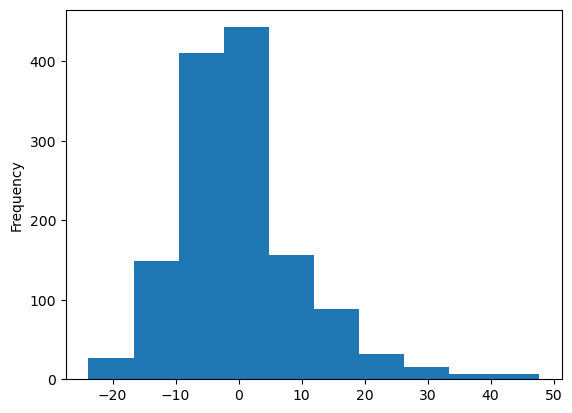

In [85]:
train['residual'].plot.hist()

## Prediction on test data

In [86]:
model3.feature_names_in_

array(['Rank', 'Profit', 'Assets', 'Employees'], dtype=object)

In [87]:
x_test  = x_test.loc[:,['Rank', 'Profit', 'Assets', 'Employees']]
x_test.head()

,Rank,Profit,Assets,Employees
1066,1067,0.990,14.1,66000.0
1076,1077,-2.025,101.6,11977.0
561,562,2.900,113.7,41547.0
1500,1501,0.450,110.2,8140.0
1539,1540,0.920,6.5,6138.0


In [88]:
test = pd.concat([x_test, y_test], axis = 1)
test.head()

,Rank,Profit,Assets,Employees,Sales
1066,1067,0.990,14.1,66000.0,12.0
1076,1077,-2.025,101.6,11977.0,5.3
561,562,2.900,113.7,41547.0,11.8
1500,1501,0.450,110.2,8140.0,5.7
1539,1540,0.920,6.5,6138.0,2.6


In [89]:
test['fitted'] = np.round(model3.predict(x_test),2)
test.head()

,Rank,Profit,Assets,Employees,Sales,fitted
1066,1067,0.990,14.1,66000.0,12.0,21.47
1076,1077,-2.025,101.6,11977.0,5.3,11.37
561,562,2.900,113.7,41547.0,11.8,27.53
1500,1501,0.450,110.2,8140.0,5.7,9.03
1539,1540,0.920,6.5,6138.0,2.6,5.15


In [90]:
test['residual'] = np.round(test.Sales - test.fitted,2)
test.head()

,Rank,Profit,Assets,Employees,Sales,fitted,residual
1066,1067,0.990,14.1,66000.0,12.0,21.47,-9.47
1076,1077,-2.025,101.6,11977.0,5.3,11.37,-6.07
561,562,2.900,113.7,41547.0,11.8,27.53,-15.73
1500,1501,0.450,110.2,8140.0,5.7,9.03,-3.33
1539,1540,0.920,6.5,6138.0,2.6,5.15,-2.55


In [92]:
r2 = r2_score(test.Sales, test.fitted)
r2*100

65.38920963867926

## Loss function - RMSE

In [93]:
model_mse = mean_squared_error(test['Sales'], test['fitted'])
model_rmse = np.sqrt(model_mse)
model_rmse

10.188170244801709